## Mathematics and art, por Sasho Kalajdzievsk
Exploración computacional recreativa de conceptos fundamentales sobre la belleza de objetos matemáticos hallados en el libro "Math and Art" de Sasho Kalajdzievski. Recorriendo geometría euclidiana, transformaciones geométricas, grupos de simetría, perspectiva-proyección, fractales, topología, teoría del color e implementando cada tópico en medida de lo posible.

# Geometría euclidiana

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch, Arc, Polygon
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches

# Configuración global para todas las visualizaciones
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

In [2]:
def draw_point(ax, x, y, label='', color='red', size=100):
    """Dibuja un punto con etiqueta"""
    ax.scatter(x, y, c=color, s=size, zorder=5, edgecolors='black', linewidths=1.5)
    if label:
        ax.text(x, y + 0.3, label, fontsize=14, fontweight='bold',
                ha='center', va='bottom')

def draw_line(ax, x1, y1, x2, y2, color='blue', linewidth=2, style='-', extend=False):
    """Dibuja una línea o segmento"""
    if extend:
        # Extender la línea más allá de los puntos
        dx = x2 - x1
        dy = y2 - y1
        length = np.sqrt(dx**2 + dy**2)
        dx_norm = dx / length
        dy_norm = dy / length
        extension = 2
        x1_ext = x1 - extension * dx_norm
        y1_ext = y1 - extension * dy_norm
        x2_ext = x2 + extension * dx_norm
        y2_ext = y2 + extension * dy_norm
        ax.plot([x1_ext, x2_ext], [y1_ext, y2_ext],
                color=color, linewidth=linewidth, linestyle=style)
    else:
        ax.plot([x1, x2], [y1, y2],
                color=color, linewidth=linewidth, linestyle=style)

def draw_arrow(ax, x1, y1, x2, y2, color='blue', linewidth=2):
    """Dibuja una flecha"""
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                           arrowstyle='->', mutation_scale=20,
                           color=color, linewidth=linewidth)
    ax.add_patch(arrow)

def setup_axis(ax, title):
    """Configura el eje con estilo limpio"""
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_title(title, pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])


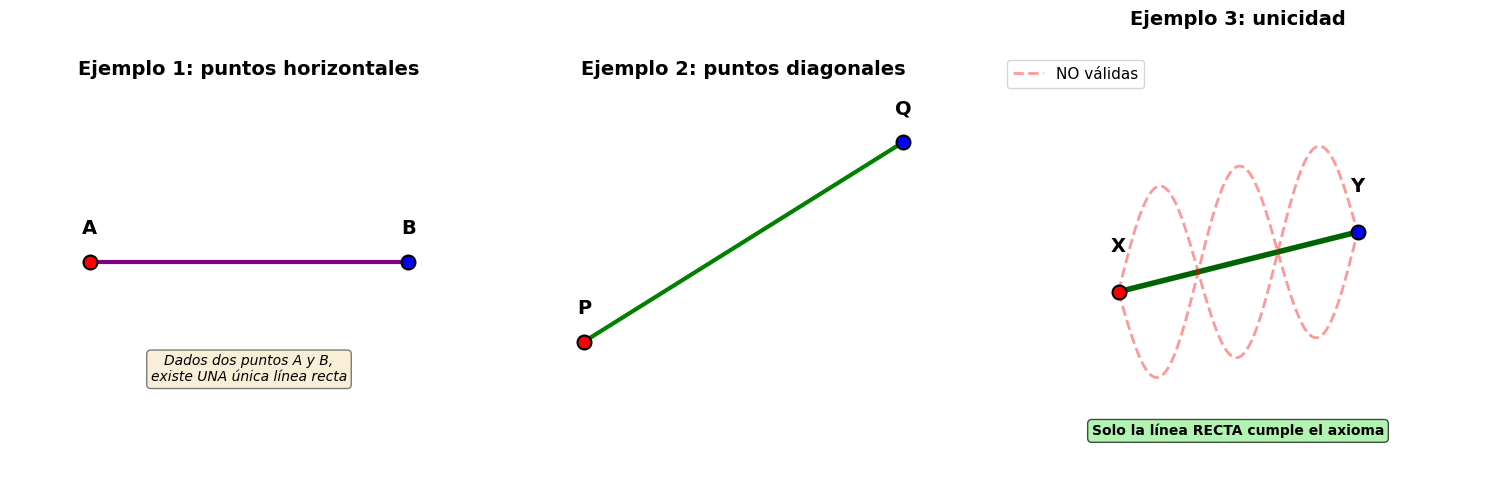

AXIOMA 1: Una línea recta puede dibujarse entre dos puntos cualesquiera


In [6]:
"""
AXIOMA 1 (Postulado 1)
Una línea recta puede ser dibujada uniendo dos puntos cualesquiera
"""

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Ejemplo 1: Dos puntos horizontales
ax1 = axes[0]
setup_axis(ax1, 'Ejemplo 1: puntos horizontales')
draw_point(ax1, 1, 2, 'A', 'red')
draw_point(ax1, 5, 2, 'B', 'blue')
draw_line(ax1, 1, 2, 5, 2, color='purple', linewidth=3)
ax1.set_xlim(0, 6)
ax1.set_ylim(0, 4)
ax1.text(3, 0.5, 'Dados dos puntos A y B,\nexiste UNA única línea recta',
         ha='center', fontsize=10, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ejemplo 2: Puntos diagonales
ax2 = axes[1]
setup_axis(ax2, 'Ejemplo 2: puntos diagonales')
draw_point(ax2, 1, 1, 'P', 'red')
draw_point(ax2, 5, 3.5, 'Q', 'blue')
draw_line(ax2, 1, 1, 5, 3.5, color='green', linewidth=3)
ax2.set_xlim(0, 6)
ax2.set_ylim(0, 4)

# Ejemplo 3: Múltiples conexiones posibles (pero solo UNA recta)
ax3 = axes[2]
setup_axis(ax3, 'Ejemplo 3: unicidad')
draw_point(ax3, 2, 2, 'X', 'red')
draw_point(ax3, 4, 2.5, 'Y', 'blue')
# Línea recta (la única válida según el axioma)
draw_line(ax3, 2, 2, 4, 2.5, color='darkgreen', linewidth=4, style='-')
# Líneas curvas (NO cumplen el axioma)
t = np.linspace(0, 1, 100)
x_curve1 = 2 + 2*t
y_curve1 = 2 + 0.5*t + 0.8*np.sin(3*np.pi*t)
ax3.plot(x_curve1, y_curve1, 'r--', linewidth=2, alpha=0.4, label='NO válidas')
y_curve2 = 2 + 0.5*t - 0.8*np.sin(3*np.pi*t)
ax3.plot(x_curve1, y_curve2, 'r--', linewidth=2, alpha=0.4)
ax3.set_xlim(1, 5)
ax3.set_ylim(0.5, 4)
ax3.legend(loc='upper left')
ax3.text(3, 0.8, 'Solo la línea RECTA cumple el axioma',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('axioma1.png', dpi=150, bbox_inches='tight')
plt.show()

print("AXIOMA 1: Una línea recta puede dibujarse entre dos puntos cualesquiera")


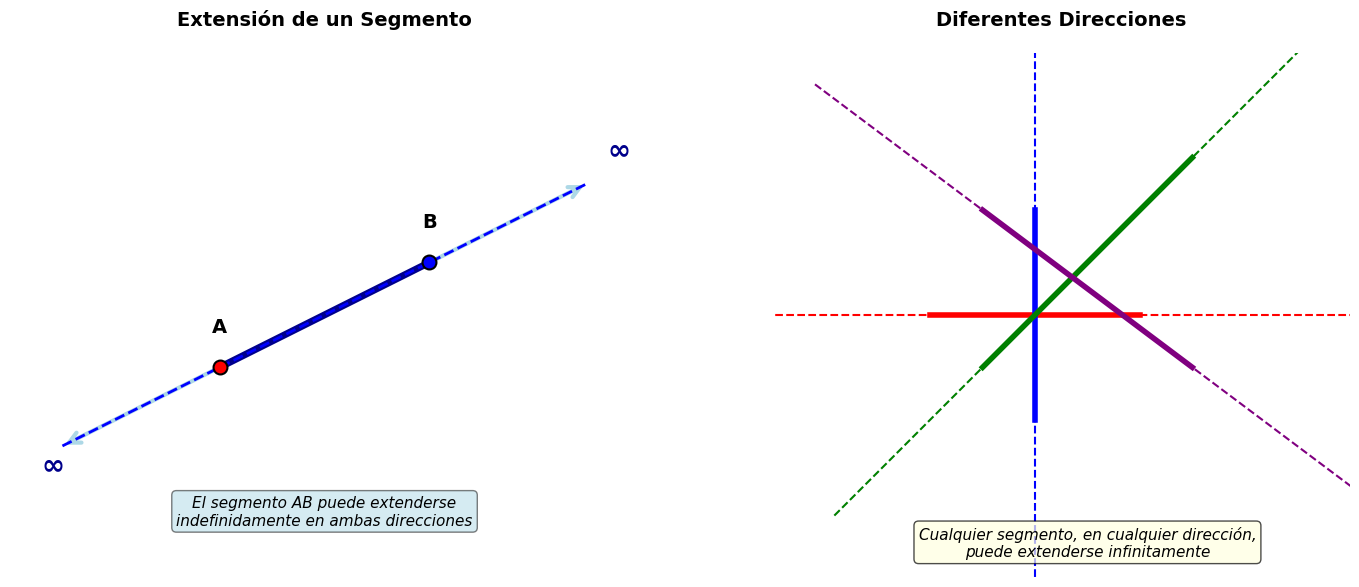

AXIOMA 2: un segmento puede extenderse indefinidamente en línea recta


In [8]:
"""
AXIOMA 2 (Postulado 2)
Un segmento de línea puede extenderse indefinidamente en ambas direcciones
"""

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Ejemplo 1: Extensión de un segmento
ax1 = axes[0]
setup_axis(ax1, 'Extensión de un Segmento')

# Segmento original
draw_point(ax1, 2, 2, 'A', 'red')
draw_point(ax1, 4, 3, 'B', 'blue')
draw_line(ax1, 2, 2, 4, 3, color='darkblue', linewidth=5)

# Extensiones (flechas indicando infinito)
draw_arrow(ax1, 2, 2, 0.5, 1.25, color='lightblue', linewidth=3)
draw_arrow(ax1, 4, 3, 5.5, 3.75, color='lightblue', linewidth=3)

# Línea extendida completa (punteada)
draw_line(ax1, 0.5, 1.25, 5.5, 3.75, color='blue', linewidth=2, style='--')

ax1.set_xlim(0, 6)
ax1.set_ylim(0, 5)
ax1.text(3, 0.5, 'El segmento AB puede extenderse\nindefinidamente en ambas direcciones',
         ha='center', fontsize=11, style='italic',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Añadir símbolo de infinito
ax1.text(0.3, 1, '∞', fontsize=20, color='darkblue', fontweight='bold')
ax1.text(5.7, 4, '∞', fontsize=20, color='darkblue', fontweight='bold')

# Ejemplo 2: Múltiples extensiones desde diferentes segmentos
ax2 = axes[1]
setup_axis(ax2, 'Diferentes Direcciones')

# Varios segmentos con diferentes direcciones
segments = [
    [(1, 2), (3, 2), 'horizontal'],
    [(2, 1), (2, 3), 'vertical'],
    [(1.5, 1.5), (3.5, 3.5), 'diagonal 45°'],
    [(3.5, 1.5), (1.5, 3), 'diagonal -45°']
]

colors = ['red', 'blue', 'green', 'purple']

for i, (p1, p2, desc) in enumerate(segments):
    x1, y1 = p1
    x2, y2 = p2
    # Segmento original (grueso)
    draw_line(ax2, x1, y1, x2, y2, color=colors[i], linewidth=4)
    # Extensión (delgado)
    draw_line(ax2, x1, y1, x2, y2, color=colors[i], linewidth=1.5,
              style='--', extend=True)

ax2.set_xlim(-0.5, 5)
ax2.set_ylim(-0.5, 4.5)
ax2.text(2.5, -0.3, 'Cualquier segmento, en cualquier dirección,\npuede extenderse infinitamente',
         ha='center', fontsize=11, style='italic',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout()
plt.savefig('axioma2.png', dpi=150, bbox_inches='tight')
plt.show()

print("AXIOMA 2: un segmento puede extenderse indefinidamente en línea recta")


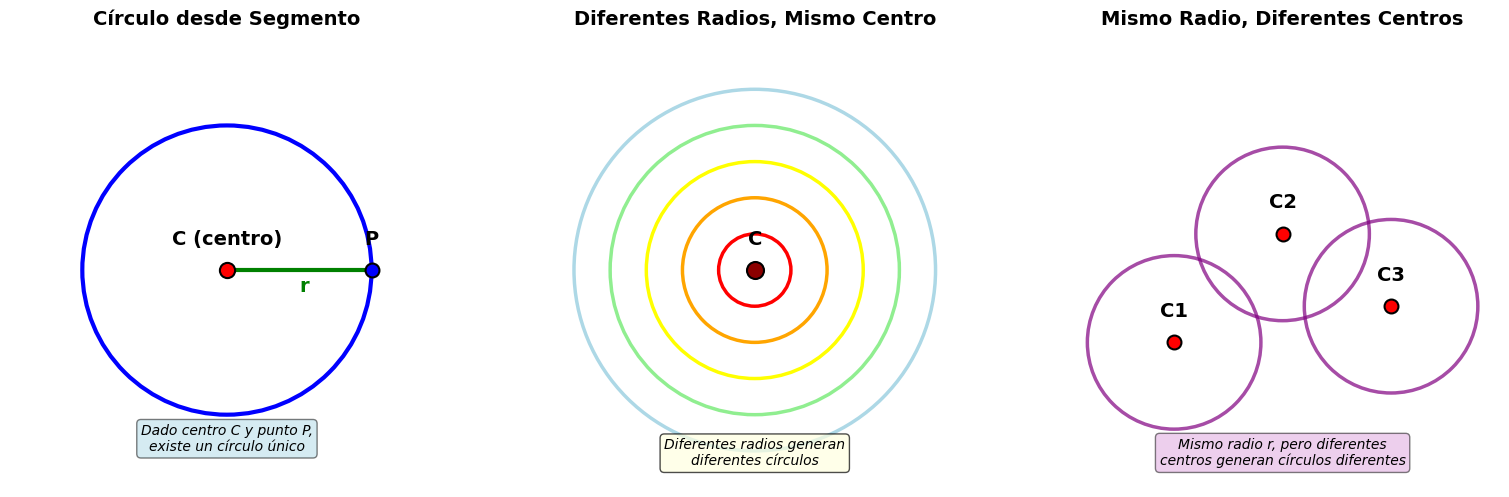

AXIOMA 3: Dado un segmento, se puede dibujar un círculo con ese radio


In [9]:
"""
AXIOMA 3 (Postulado 3)
Dado un punto y una distancia, se puede dibujar un círculo con ese centro y radio
"""

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Ejemplo 1: Círculo básico
ax1 = axes[0]
setup_axis(ax1, 'Círculo desde Segmento')

center = (3, 3)
point = (5, 3)
radius = np.sqrt((point[0]-center[0])**2 + (point[1]-center[1])**2)

# Dibujar círculo
circle = Circle(center, radius, fill=False, edgecolor='blue', linewidth=3)
ax1.add_patch(circle)

# Dibujar centro y punto en perímetro
draw_point(ax1, center[0], center[1], 'C (centro)', 'red', size=120)
draw_point(ax1, point[0], point[1], 'P', 'blue', size=100)

# Dibujar radio
draw_line(ax1, center[0], center[1], point[0], point[1],
          color='green', linewidth=3)
ax1.text((center[0]+point[0])/2, (center[1]+point[1])/2 - 0.3,
         'r', fontsize=14, fontweight='bold', color='green')

ax1.set_xlim(0, 6)
ax1.set_ylim(0, 6)
ax1.text(3, 0.5, 'Dado centro C y punto P,\nexiste un círculo único',
         ha='center', fontsize=10, style='italic',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Ejemplo 2: Múltiples círculos desde el mismo centro
ax2 = axes[1]
setup_axis(ax2, 'Diferentes Radios, Mismo Centro')

center = (3, 3)
radii = [0.5, 1.0, 1.5, 2.0, 2.5]
colors_circles = ['red', 'orange', 'yellow', 'lightgreen', 'lightblue']

for r, col in zip(radii, colors_circles):
    circle = Circle(center, r, fill=False, edgecolor=col, linewidth=2.5)
    ax2.add_patch(circle)

draw_point(ax2, center[0], center[1], 'C', 'darkred', size=150)

ax2.set_xlim(0, 6)
ax2.set_ylim(0, 6)
ax2.text(3, 0.3, 'Diferentes radios generan\ndiferentes círculos',
         ha='center', fontsize=10, style='italic',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# Ejemplo 3: Círculos desde diferentes centros
ax3 = axes[2]
setup_axis(ax3, 'Mismo Radio, Diferentes Centros')

centers = [(1.5, 2), (3, 3.5), (4.5, 2.5)]
radius = 1.2

for i, cent in enumerate(centers):
    circle = Circle(cent, radius, fill=False, edgecolor='purple',
                   linewidth=2.5, alpha=0.7)
    ax3.add_patch(circle)
    draw_point(ax3, cent[0], cent[1], f'C{i+1}', 'red', size=100)

ax3.set_xlim(0, 6)
ax3.set_ylim(0, 6)
ax3.text(3, 0.3, 'Mismo radio r, pero diferentes\ncentros generan círculos diferentes',
         ha='center', fontsize=10, style='italic',
         bbox=dict(boxstyle='round', facecolor='plum', alpha=0.5))

plt.tight_layout()
plt.savefig('axioma3.png', dpi=150, bbox_inches='tight')
plt.show()

print("AXIOMA 3: Dado un segmento, se puede dibujar un círculo con ese radio")


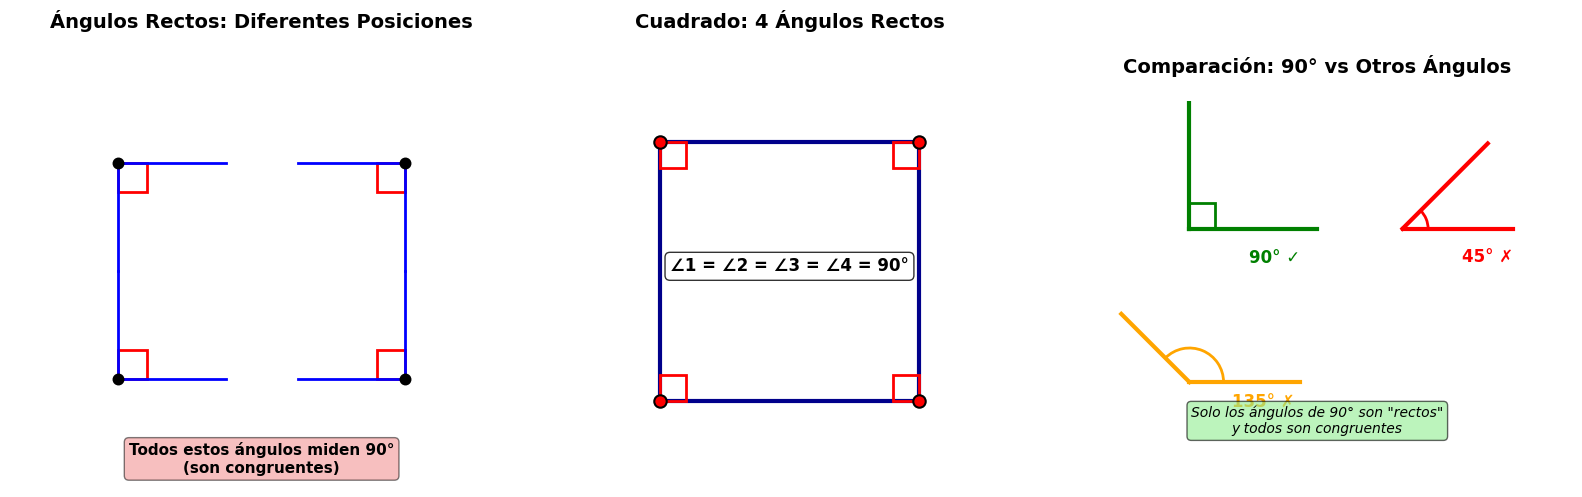

AXIOMA 4: Todos los ángulos rectos son congruentes (90°)


In [10]:
"""
AXIOMA 4 (Postulado 4)
"All right angles are congruent"
Todos los ángulos rectos son iguales (miden 90°)
"""

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

def draw_right_angle(ax, origin, direction1, direction2, size=0.4, color='red'):
    """Dibuja el símbolo de ángulo recto"""
    # Normalizar direcciones
    d1 = np.array(direction1) / np.linalg.norm(direction1)
    d2 = np.array(direction2) / np.linalg.norm(direction2)

    # Puntos del cuadrito
    p1 = origin + d1 * size
    p2 = origin + d1 * size + d2 * size
    p3 = origin + d2 * size

    # Dibujar el cuadrito
    square = plt.Polygon([origin, p1, p2, p3],
                         fill=False, edgecolor=color, linewidth=2)
    ax.add_patch(square)

# Ejemplo 1: Ángulos rectos en diferentes orientaciones
ax1 = axes[0]
setup_axis(ax1, 'Ángulos Rectos: Diferentes Posiciones')

positions = [
    [(1, 1), (1, 0), (0, 1)],    # Abajo-izquierda
    [(5, 1), (-1, 0), (0, 1)],   # Abajo-derecha
    [(1, 4), (1, 0), (0, -1)],   # Arriba-izquierda
    [(5, 4), (-1, 0), (0, -1)]   # Arriba-derecha
]

for pos, dir1, dir2 in positions:
    # Dibujar líneas
    draw_line(ax1, pos[0], pos[1], pos[0]+dir1[0]*1.5, pos[1]+dir1[1]*1.5,
              color='blue', linewidth=2)
    draw_line(ax1, pos[0], pos[1], pos[0]+dir2[0]*1.5, pos[1]+dir2[1]*1.5,
              color='blue', linewidth=2)
    # Dibujar símbolo de ángulo recto
    draw_right_angle(ax1, np.array(pos), dir1, dir2, color='red')
    draw_point(ax1, pos[0], pos[1], '', 'black', size=50)

ax1.set_xlim(-0.5, 6.5)
ax1.set_ylim(-0.5, 5.5)
ax1.text(3, -0.3, 'Todos estos ángulos miden 90°\n(son congruentes)',
         ha='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

# Ejemplo 2: Cuadrado (4 ángulos rectos)
ax2 = axes[1]
setup_axis(ax2, 'Cuadrado: 4 Ángulos Rectos')

square_points = np.array([[1, 1], [4, 1], [4, 4], [1, 4]])
square = plt.Polygon(square_points, fill=False, edgecolor='darkblue', linewidth=3)
ax2.add_patch(square)

# Dibujar símbolos de ángulo recto en cada esquina
corners = [
    [(1, 1), (1, 0), (0, 1)],
    [(4, 1), (-1, 0), (0, 1)],
    [(4, 4), (-1, 0), (0, -1)],
    [(1, 4), (1, 0), (0, -1)]
]

for corner, dir1, dir2 in corners:
    draw_right_angle(ax2, np.array(corner), dir1, dir2, size=0.3, color='red')
    draw_point(ax2, corner[0], corner[1], '', 'red', size=80)

ax2.text(2.5, 2.5, '∠1 = ∠2 = ∠3 = ∠4 = 90°',
         ha='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

# Ejemplo 3: Comparación visual con otros ángulos
ax3 = axes[2]
setup_axis(ax3, 'Comparación: 90° vs Otros Ángulos')

# Ángulo recto (90°)
origin1 = np.array([1.5, 2.5])
draw_line(ax3, origin1[0], origin1[1], origin1[0]+1.5, origin1[1],
          color='green', linewidth=3)
draw_line(ax3, origin1[0], origin1[1], origin1[0], origin1[1]+1.5,
          color='green', linewidth=3)
draw_right_angle(ax3, origin1, (1, 0), (0, 1), color='green', size=0.3)
ax3.text(origin1[0]+0.7, origin1[1]-0.4, '90° ✓', fontsize=12,
         fontweight='bold', color='green')

# Ángulo agudo (45°)
origin2 = np.array([4, 2.5])
draw_line(ax3, origin2[0], origin2[1], origin2[0]+1.3, origin2[1],
          color='red', linewidth=3)
draw_line(ax3, origin2[0], origin2[1], origin2[0]+1, origin2[1]+1,
          color='red', linewidth=3)
arc1 = Arc(origin2, 0.6, 0.6, angle=0, theta1=0, theta2=45,
           color='red', linewidth=2)
ax3.add_patch(arc1)
ax3.text(origin2[0]+0.7, origin2[1]-0.4, '45° ✗', fontsize=12,
         fontweight='bold', color='red')

# Ángulo obtuso (135°)
origin3 = np.array([1.5, 0.7])
draw_line(ax3, origin3[0], origin3[1], origin3[0]+1.3, origin3[1],
          color='orange', linewidth=3)
draw_line(ax3, origin3[0], origin3[1], origin3[0]-0.8, origin3[1]+0.8,
          color='orange', linewidth=3)
arc2 = Arc(origin3, 0.8, 0.8, angle=0, theta1=0, theta2=135,
           color='orange', linewidth=2)
ax3.add_patch(arc2)
ax3.text(origin3[0]+0.5, origin3[1]-0.3, '135° ✗', fontsize=12,
         fontweight='bold', color='orange')

ax3.set_xlim(0, 6)
ax3.set_ylim(0, 4)
ax3.text(3, 0.1, 'Solo los ángulos de 90° son "rectos"\ny todos son congruentes',
         ha='center', fontsize=10, style='italic',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.6))

plt.tight_layout()
plt.savefig('axioma4.png', dpi=150, bbox_inches='tight')
plt.show()

print("AXIOMA 4: Todos los ángulos rectos son congruentes (90°)")

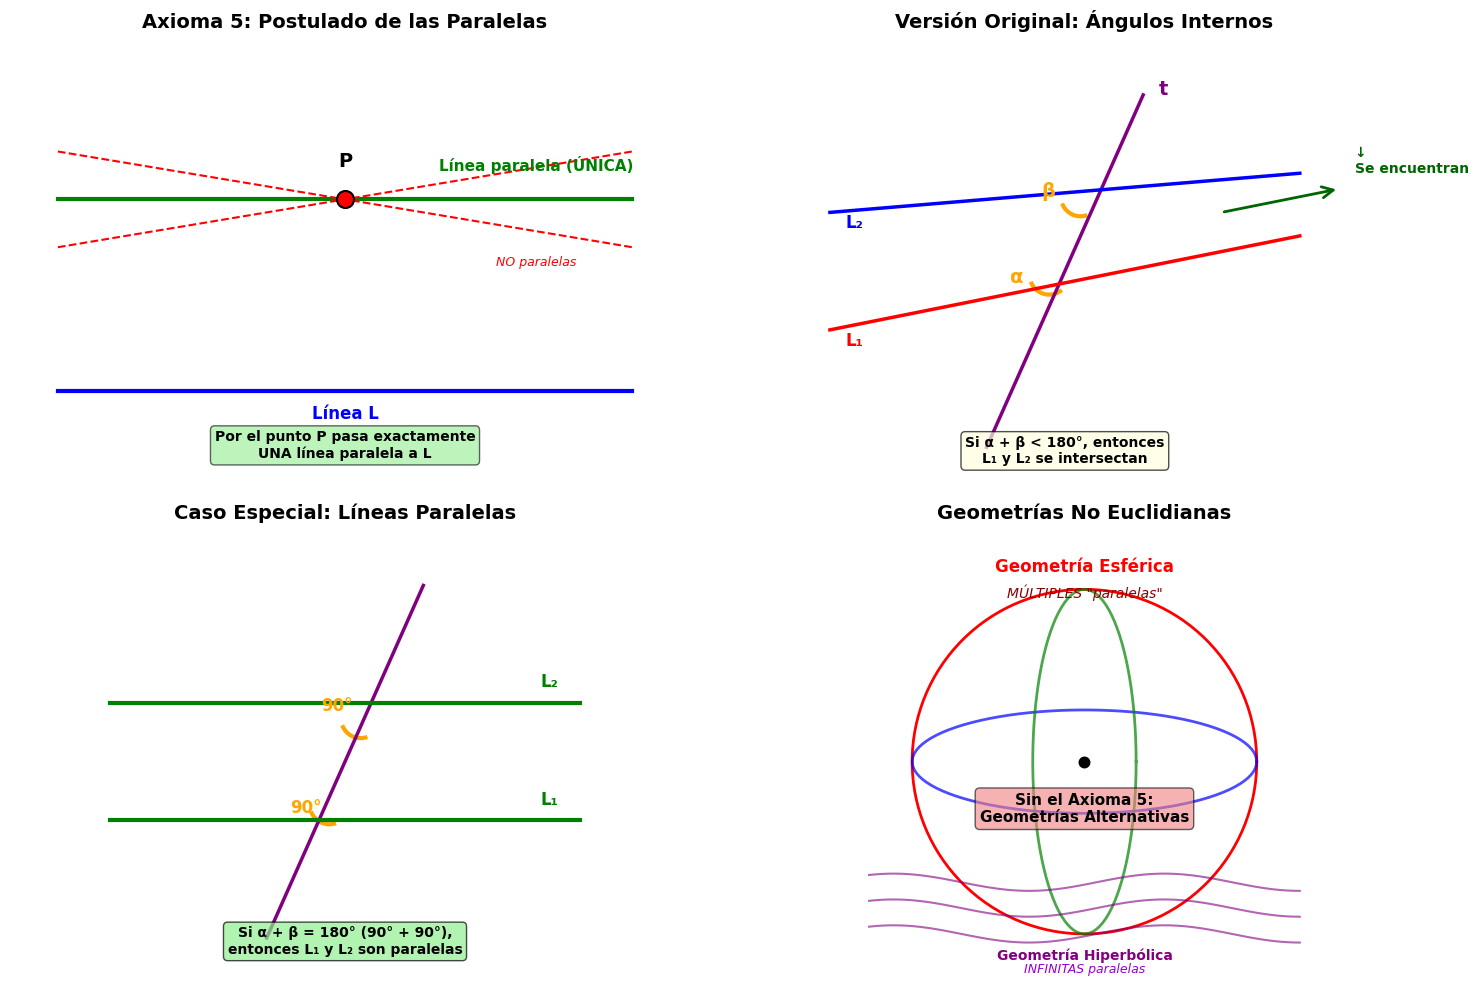

AXIOMA 5: Postulado de las Paralelas
   - Por un punto exterior a una recta pasa UNA y solo UNA paralela
   - Este axioma define la geometría EUCLIDIANA


In [14]:

"""
AXIOMA 5 (Postulado de las Paralelas - Postulado 5)
"Dada una línea y un punto fuera de ella, existe exactamente UNA línea paralela
que pasa por ese punto"
"""

fig = plt.figure(figsize=(16, 10))

# Ejemplo 1: Postulado de las paralelas (versión moderna)
ax1 = plt.subplot(2, 2, 1)
setup_axis(ax1, 'Axioma 5: Postulado de las Paralelas')

# Línea original
draw_line(ax1, 0, 2, 6, 2, color='blue', linewidth=3)
ax1.text(3, 1.7, 'Línea L', ha='center', fontsize=12, fontweight='bold', color='blue')

# Punto externo
draw_point(ax1, 3, 4, 'P', 'red', size=150)

# Línea paralela (la ÚNICA)
draw_line(ax1, 0, 4, 6, 4, color='green', linewidth=3)
ax1.text(5, 4.3, 'Línea paralela (ÚNICA)', ha='center', fontsize=11,
         fontweight='bold', color='green')

# Líneas NO paralelas (punteadas, para contrastar)
draw_line(ax1, 0, 3.5, 6, 4.5, color='red', linewidth=1.5, style='--')
draw_line(ax1, 0, 4.5, 6, 3.5, color='red', linewidth=1.5, style='--')
ax1.text(5, 3.3, 'NO paralelas', ha='center', fontsize=9,
         color='red', style='italic')

ax1.set_xlim(-0.5, 6.5)
ax1.set_ylim(1, 5.5)
ax1.text(3, 1.3, 'Por el punto P pasa exactamente\nUNA línea paralela a L',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.6))

# Ejemplo 2: Versión original de Euclides
ax2 = plt.subplot(2, 2, 2)
setup_axis(ax2, 'Versión Original: Ángulos Internos')

# Línea transversal
draw_line(ax2, 2, 0.5, 4, 5, color='purple', linewidth=2.5)
ax2.text(4.2, 5, 't', fontsize=14, fontweight='bold', color='purple')

# Dos líneas que intersectan la transversal
# Línea 1 (más inclinada - se encontrarán)
draw_line(ax2, 0, 2, 6, 3.2, color='red', linewidth=2.5)
ax2.text(0.2, 1.8, 'L₁', fontsize=12, fontweight='bold', color='red')

# Línea 2 (menos inclinada)
draw_line(ax2, 0, 3.5, 6, 4, color='blue', linewidth=2.5)
ax2.text(0.2, 3.3, 'L₂', fontsize=12, fontweight='bold', color='blue')

# Marcar ángulos internos
angle_point1 = (2.8, 2.7)
angle_point2 = (3.2, 3.7)

# Arcos para ángulos
arc1 = Arc(angle_point1, 0.5, 0.5, angle=20, theta1=180, theta2=290,
           color='orange', linewidth=3)
arc2 = Arc(angle_point2, 0.5, 0.5, angle=20, theta1=180, theta2=270,
           color='orange', linewidth=3)
ax2.add_patch(arc1)
ax2.add_patch(arc2)

ax2.text(2.3, 2.6, 'α', fontsize=14, fontweight='bold', color='orange')
ax2.text(2.7, 3.7, 'β', fontsize=14, fontweight='bold', color='orange')

# Punto de intersección futuro (indicado con flecha)
draw_arrow(ax2, 5, 3.5, 6.5, 3.8, color='darkgreen', linewidth=2)
ax2.text(6.7, 4, '↓\nSe encuentran', fontsize=10, color='darkgreen',
         fontweight='bold')

ax2.set_xlim(-0.5, 7)
ax2.set_ylim(0, 5.5)
ax2.text(3, 0.3, 'Si α + β < 180°, entonces\nL₁ y L₂ se intersectan',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# Ejemplo 3: Caso de paralelas (α + β = 180°)
ax3 = plt.subplot(2, 2, 3)
setup_axis(ax3, 'Caso Especial: Líneas Paralelas')

# Línea transversal
draw_line(ax3, 2, 0.5, 4, 5, color='purple', linewidth=2.5)

# Dos líneas paralelas
draw_line(ax3, 0, 2, 6, 2, color='green', linewidth=3)
draw_line(ax3, 0, 3.5, 6, 3.5, color='green', linewidth=3)

ax3.text(5.5, 2.2, 'L₁', fontsize=12, fontweight='bold', color='green')
ax3.text(5.5, 3.7, 'L₂', fontsize=12, fontweight='bold', color='green')

# Marcar ángulos internos para paralelas
angle_point3 = (2.8, 2.2)
angle_point4 = (3.2, 3.3)

# Arcos para ángulos (ambos 90° en este ejemplo)
arc3 = Arc(angle_point3, 0.5, 0.5, angle=20, theta1=180, theta2=270,
           color='orange', linewidth=3)
arc4 = Arc(angle_point4, 0.5, 0.5, angle=20, theta1=180, theta2=270,
           color='orange', linewidth=3)
ax3.add_patch(arc3)
ax3.add_patch(arc4)

ax3.text(2.3, 2.1, '90°', fontsize=12, fontweight='bold', color='orange')
ax3.text(2.7, 3.4, '90°', fontsize=12, fontweight='bold', color='orange')

ax3.set_xlim(-0.5, 6.5)
ax3.set_ylim(0, 5.5)
ax3.text(3, 0.3, 'Si α + β = 180° (90° + 90°),\nentonces L₁ y L₂ son paralelas',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Ejemplo 4: Geometrías alternativas
ax4 = plt.subplot(2, 2, 4)
setup_axis(ax4, 'Geometrías No Euclidianas')

# Dibujar una esfera para geometría esférica
circle = Circle((3, 2.5), 2, fill=False, edgecolor='red', linewidth=2)
ax4.add_patch(circle)

# "Líneas" en geometría esférica (círculos máximos)
theta = np.linspace(0, 2*np.pi, 100)
# Círculo máximo 1
x1 = 3 + 2 * np.cos(theta)
y1 = 2.5 + 2 * np.sin(theta) * 0.3
ax4.plot(x1, y1, 'blue', linewidth=2, alpha=0.7)

# Círculo máximo 2
x2 = 3 + 2 * np.cos(theta) * 0.3
y2 = 2.5 + 2 * np.sin(theta)
ax4.plot(x2, y2, 'green', linewidth=2, alpha=0.7)

# Punto de intersección adicional
draw_point(ax4, 3, 2.5, '', 'black', size=50)
ax4.text(3, 4.7, 'Geometría Esférica', ha='center', fontsize=12,
         fontweight='bold', color='red')
ax4.text(3, 4.4, 'MÚLTIPLES "paralelas"', ha='center', fontsize=10,
         color='darkred', style='italic')

# Geometría hiperbólica (representación simplificada)
x_hyper = np.linspace(0.5, 5.5, 100)
for i in range(3):
    y_hyper = 0.5 + i * 0.3 + 0.1 * np.sin(x_hyper * 2)
    ax4.plot(x_hyper, y_hyper, 'purple', linewidth=1.5, alpha=0.6)

ax4.text(3, 0.2, 'Geometría Hiperbólica', ha='center', fontsize=10,
         fontweight='bold', color='purple')
ax4.text(3, 0.05, 'INFINITAS paralelas', ha='center', fontsize=9,
         color='darkviolet', style='italic')

ax4.set_xlim(0, 6)
ax4.set_ylim(0, 5)
ax4.text(3, 1.8, 'Sin el Axioma 5:\nGeometrías Alternativas',
         ha='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.6))

plt.tight_layout()
plt.savefig('axioma5.png', dpi=150, bbox_inches='tight')
plt.show()

print("AXIOMA 5: Postulado de las Paralelas")
print("   - Por un punto exterior a una recta pasa UNA y solo UNA paralela")
print("   - Este axioma define la geometría EUCLIDIANA")